<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-1"><span class="toc-item-num">1&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li><li><span><a href="#-Комментарий-ревьюера-5" data-toc-modified-id="-Комментарий-ревьюера-5-2"><span class="toc-item-num">2&nbsp;&nbsp;</span> Комментарий ревьюера 5</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [18]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [19]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.102255,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,169.203692
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,21.189133,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,206.497729
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,41.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


посмотрим типы данных и кол-во ненулевых значений

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_ar

### Вывод

1. first_day_exposition - object - должен быть тип datetime


## Предобработка данных

Посчитаем количество пропусков

In [21]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64

Заменим пропуски в balcony

In [22]:
data['balcony'] = data['balcony'].fillna(0)

В столбец апартаменты все пропущенные значения заменим на False

In [23]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Столбец заменили на медианное значение

In [24]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Пропусков мало,ничего не потеряем если уберём их

In [25]:
data = data.dropna(subset=['floors_total'])

Наличия строк без города,уберем их

In [26]:
data = data.dropna(subset=['locality_name'])

Переведем столбец с датой в формат даты без времени, т.к. время не указано

In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Замениним медианным значением

In [28]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

Заполняем пропуски площади поделив цену кв на стоимость 1 м.кв.

In [29]:
data['living_area'].isna().sum()

0

In [30]:
data['living_area']=data['living_area'].fillna(data['living_area'].median())

In [31]:
# Вот что теперь у нас. Ты общую в жилую кидаешь.
data[data.living_area == data.total_area]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4060,0,1240000.0,30.0,2018-03-09,1,2.65,5.0,30.0,2,False,...,NaN,0.0,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,37.0
4813,11,3690000.0,30.0,2018-02-17,1,2.65,5.0,30.0,2,False,...,NaN,0.0,Санкт-Петербург,16159.0,12893.0,1.0,526.0,0.0,NaN,45.0
5827,20,990000.0,30.0,2018-05-06,1,2.50,2.0,30.0,1,False,...,NaN,0.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,103.0
6481,6,2350000.0,30.0,2019-03-11,1,2.50,9.0,30.0,2,False,...,8.7,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
6894,7,3700000.0,30.0,2019-03-07,1,2.60,9.0,30.0,3,False,...,NaN,0.0,Санкт-Петербург,27232.0,12353.0,1.0,547.0,0.0,NaN,26.0
7333,7,3650000.0,30.0,2019-01-28,1,2.50,12.0,30.0,12,False,...,NaN,1.0,Санкт-Петербург,13037.0,9869.0,0.0,NaN,0.0,NaN,39.0
9861,10,2350000.0,25.0,2017-12-03,0,2.65,22.0,25.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.0
12129,0,1150000.0,30.0,2018-08-05,2,2.50,5.0,30.0,2,False,...,NaN,0.0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,45.0
12465,6,2970000.0,30.0,2017-12-12,1,2.50,5.0,30.0,5,False,...,NaN,0.0,Санкт-Петербург,45518.0,18242.0,0.0,NaN,1.0,533.0,150.0
12691,1,3700000.0,24.2,2017-11-10,0,2.65,19.0,24.2,13,False,...,NaN,1.0,Санкт-Петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,74.0


In [32]:
data['living_area'].isna().sum()

0

Заполняем средним

In [33]:
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())

## Рассчёты и добавление результатов в таблицу

Цена квадратного метра

In [34]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

Для удобства просмотра приведем к типу int

In [35]:
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

Столбец дня недели

In [36]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Столбец месяца

In [37]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Столбец года

In [38]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Функция категоризации по этажам

In [39]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [40]:
data['floor_category'] = data.apply(floor_category, axis = 1)

In [41]:
data['floor_category'] = data.apply(floor_category, axis = 1)

Столбец соотношения жилой плозади к общей

In [42]:
data['useful_area_ratio'] = (data['living_area'] / data['total_area']*1000).round()

Столбец отношения площади кухни к общей

In [43]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

## Исследовательский анализ данных

Изучим общую площадь

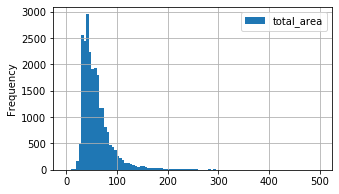

In [44]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))

In [45]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

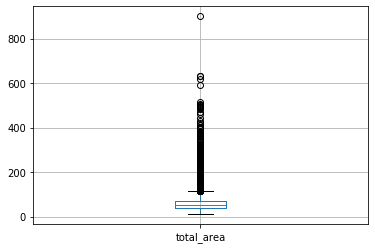

In [46]:
data.boxplot(column=['total_area'])

In [47]:
print(data[data['total_area'] > 600]['total_area'].count())

4


In [48]:
import math
data = data.query('total_area <= 600 or ~(total_area > 600)')
data = data.reset_index(drop = True)

In [49]:
data = data.query('total_area >= 20 or ~(total_area < 20)')
data = data.reset_index(drop = True)

In [50]:
data['total_area'].describe()

count    23534.000000
mean        60.265096
std         34.641526
min         20.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        590.000000
Name: total_area, dtype: float64

Изучим цену

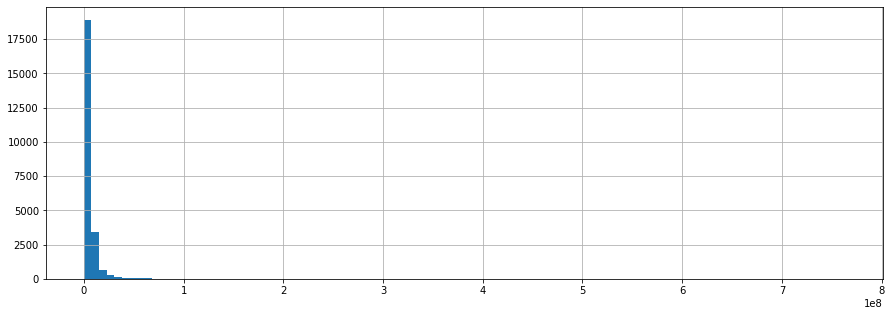

In [51]:
data['last_price'].hist(bins=100, figsize = (15,5))

In [52]:
data['last_price'].describe()

count    2.353400e+04
mean     6.503946e+06
std      1.033159e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

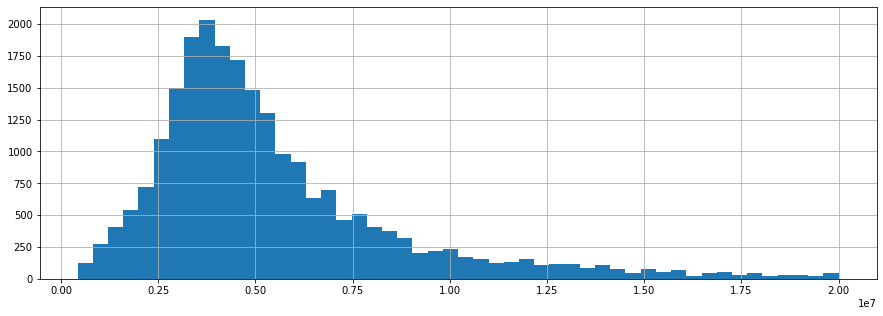

In [53]:
data['last_price'].hist(bins=50, figsize = (15,5), range=(4.3e+05,2e+07))

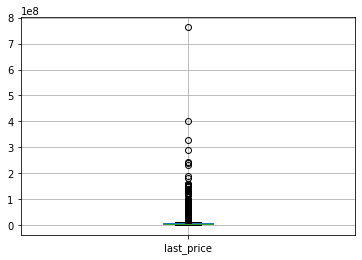

In [54]:
data.boxplot(column=['last_price'])

In [55]:
data = data.query('last_price <= 6.900000e+06 or ~(last_price > 6.900000e+06)')
data = data.reset_index(drop = True)

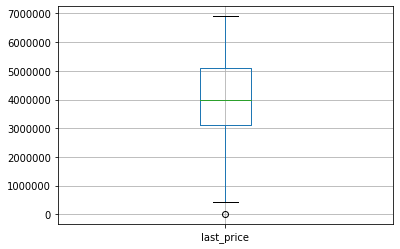

In [56]:
data.boxplot(column=['last_price'])

In [57]:
#  КОД РЕВЬЮЕРА
data.last_price.min()

12190.0

In [58]:
data = data[data['last_price'] != 12190]

In [59]:
data.last_price.min()

430000.0

Изучим число комнат

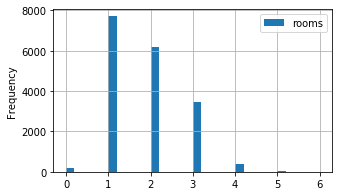

In [60]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

In [61]:
data['rooms'].describe()

count    17911.000000
mean         1.790687
std          0.848959
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: rooms, dtype: float64

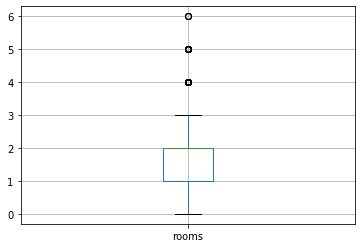

In [62]:
data.boxplot(column=['rooms'])

Изучим высоту потолков

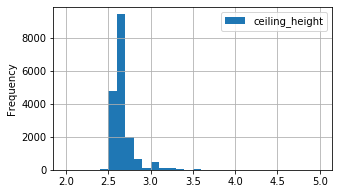

In [63]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))

In [64]:
data['ceiling_height'].describe()

count    17911.000000
mean         2.672604
std          0.780430
min          1.000000
25%          2.550000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

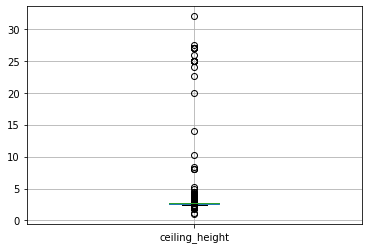

In [65]:
data.boxplot(column=['ceiling_height'])

In [66]:
data = data.query('ceiling_height <= 3 or ~(ceiling_height > 3)')
data = data.reset_index(drop = True)

In [67]:
data = data.query('ceiling_height >= 2.6 or ~(ceiling_height < 2.6)')
data = data.reset_index(drop = True)

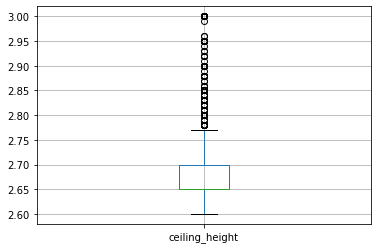

In [68]:
data.boxplot(column=['ceiling_height'])

In [69]:
data['ceiling_height'].describe()

count    12672.000000
mean         2.678508
std          0.081843
min          2.600000
25%          2.650000
50%          2.650000
75%          2.700000
max          3.000000
Name: ceiling_height, dtype: float64

Вывод:
Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. 
Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. 
Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.
Высота потолков в среднем составляет 2,7 м, медиана 2,65 м.

1.Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану.

In [70]:
data['days_exposition'].describe()

count    12672.000000
mean       158.590593
std        194.937391
min          2.000000
25%         45.000000
50%         95.000000
75%        189.000000
max       1512.000000
Name: days_exposition, dtype: float64

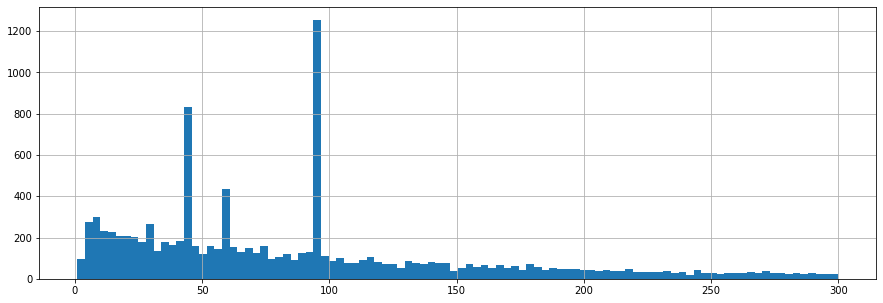

In [71]:
data['days_exposition'].hist(bins=100, figsize = (15,5),range=(1,300)) 

Есть два топовых значения, используем метод value_counts()

In [72]:
data['days_exposition'].value_counts()

95.0      1192
45.0       660
60.0       330
7.0        131
30.0       120
          ... 
1177.0       1
880.0        1
816.0        1
668.0        1
797.0        1
Name: days_exposition, Length: 944, dtype: int64

Много значений где срок размещения 95 и 45 дней.В среднем продажа занимает от 45 до 198 дня

Какой период продажи можно назвать необычно быстрым, а какой — необычно долгим?

2.Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

Отфильтруем данные от аномалий и запишем их в новый датафрейм good_data

In [73]:
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

In [74]:
import matplotlib.pyplot as plt

(1, 1000)

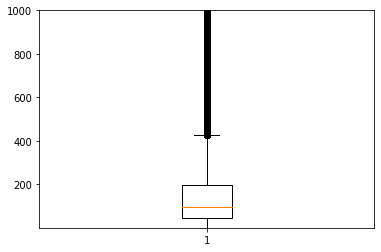

In [75]:
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

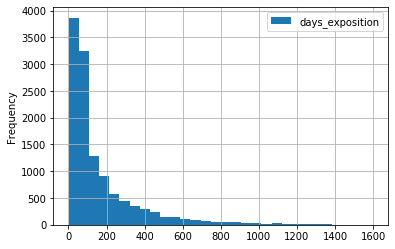

In [76]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))

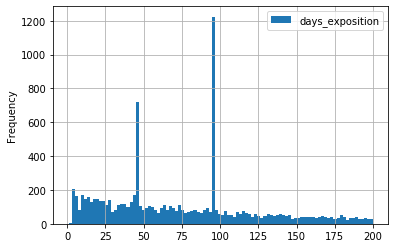

In [77]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

In [78]:
good_data['days_exposition'].describe()

count    12091.000000
mean       164.200066
std        197.779805
min          2.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1512.000000
Name: days_exposition, dtype: float64

Изучим, зависит ли цена  от общей площади квартиры, числа комнат, этажа (первого или последнего), удалённости от центра, от даты размещения: дня недели, месяца и года.

Зависимость цены от общей площади квартиры.

0.5034332442997942

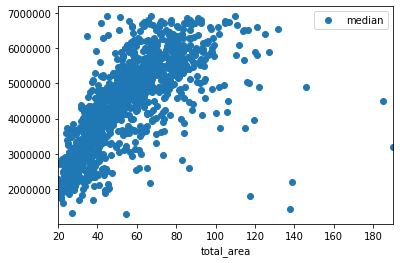

In [79]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

Корреляция в 0,5 говорит о наличии связи, однако не слишком сильной.

Зависимость цены от числа комнат.

0.32499235829125356

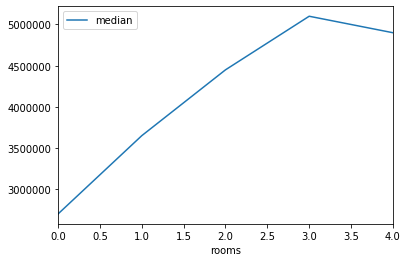

In [80]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Чем ближе количество комнат к 1 тем ниже стоимость квадратного метра.
Зависимость очень слабая - согласно корреляции - 0.3

Зависимость цены от этажа (первого или последнего)

In [81]:
data['last_price'].corr(data["rooms"])

0.32499235829125356

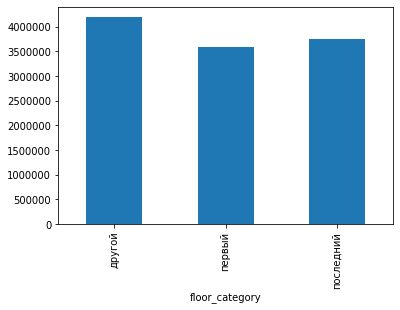

In [82]:
(data.groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',kind='bar')
)

Как правило квартиры на первом этаже дешевле квартир на последнем этаже 

Зависимость цены от удалённости от центра.

-0.2596157072658303

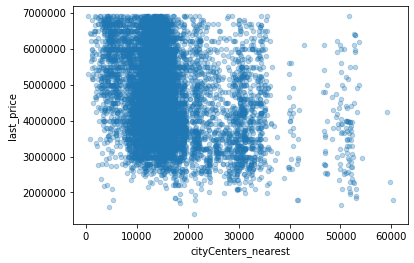

In [83]:
data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

data['cityCenters_nearest'].corr(data['last_price'])

Видим зависимость стоимости квадратного метра от близости к центру,чем ближе к центру, тем выше стоимость.

Зависимость цены от даты размещения: дня недели.

,mean,count,median
weekday_exposition,,,
0,4.170242e+06,1870,4147600.0
6,4.123737e+06,934,4126010.0
1,4.150259e+06,2214,4100000.0
2,4.131825e+06,2108,4100000.0
3,4.131825e+06,2282,4100000.0
4,4.131849e+06,2202,4050000.0
5,4.033078e+06,1062,4000000.0


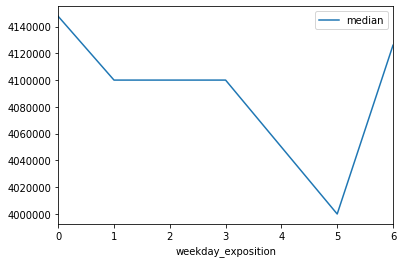

In [84]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Как мы видим,в понедельник самая высокая цена,в субботу стоимость самая низкая.

Зависимость цены от даты размещения: месяца.

,mean,count,median
month_exposition,,,
4,4.208244e+06,1235,4245000.0
11,4.171879e+06,1289,4140000.0
3,4.167180e+06,1286,4110000.0
2,4.110327e+06,1404,4100000.0
5,4.120837e+06,752,4100000.0
7,4.101648e+06,932,4100000.0
9,4.150201e+06,1023,4100000.0
12,4.108766e+06,901,4100000.0
8,4.121116e+06,922,4095000.0


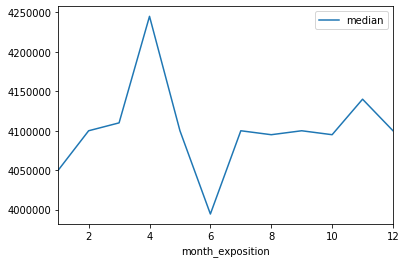

In [85]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

 Самая высокая цена в апреле ,самая низкая в июне. Наверное, это связано с отпусками.

Зависимость цены от даты размещения: года.

,mean,count,median
year_exposition,,,
2019,4.357793e+06,1246,4500000.0
2014,4.528505e+06,39,4421650.0
2015,4.367250e+06,635,4350000.0
2018,4.113474e+06,4394,4100000.0
2016,4.103888e+06,1632,4000000.0
2017,4.064112e+06,4726,4000000.0


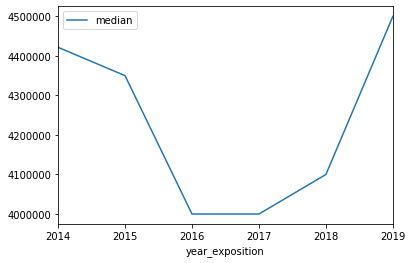

In [86]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Видим, что с 2014 до 2016 года цена падала,потом она была почти стабильная,в течении двух лет,затем опять начала расти.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделем населённые пункты с самой высокой и низкой стоимостью жилья.

Построим таблицу где сгруппируем среднюю цену квадратного метра по населенным пунктам

In [87]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean', 'median' ])

Переименуем строки чтобы была возможность к ним обращаться

In [88]:
locality_pivot_table.columns = ['count', 'mean', 'median' ]

Отсортируем по количеству объявлений

In [89]:
locality_pivot_table.sort_values(by = 'count', ascending = False, inplace = True)

In [90]:
locality_pivot_table.head(10)

,count,mean,median
locality_name,,,
Санкт-Петербург,7164,102665.225991,100000.0
посёлок Мурино,492,85582.325203,85912.5
посёлок Шушары,363,78204.889807,75917.0
Всеволожск,329,67191.215805,65896.0
посёлок Парголово,281,89568.654804,91428.0
деревня Кудрово,276,91955.800725,91617.5
Гатчина,210,67518.866667,67721.5
Колпино,192,74609.062500,74689.5
Пушкин,170,98577.217647,97389.5


Отсортируем по цене за кв.м.

In [91]:
locality_pivot_table.sort_values(by = 'mean', ascending = False, inplace = True)

In [92]:
locality_pivot_table.head(10)

,count,mean,median
locality_name,,,
Зеленогорск,9,104604.222222,97192.0
Санкт-Петербург,7164,102665.225991,100000.0
Кудрово,152,99053.486842,99723.0
Пушкин,170,98577.217647,97389.5
Сестрорецк,86,97893.558140,95190.0
посёлок Левашово,1,96997.000000,96997.0
поселок Тельмана,1,93093.000000,93093.0
Мурино,29,92732.241379,89928.0
деревня Кудрово,276,91955.800725,91617.5


In [93]:
locality_pivot_table.sort_values(by = 'mean', ascending = True, inplace = True)

In [94]:
locality_pivot_table.head(10)

,count,mean,median
locality_name,,,
деревня Старополье,3,11206.0,11000.0
посёлок станции Свирь,2,11481.0,11481.0
деревня Вахнова Кара,1,11688.0,11688.0
деревня Выскатка,2,12335.0,12335.0
поселок Совхозный,2,12628.5,12628.5
деревня Малая Романовка,1,12724.0,12724.0
поселок Тёсово-4,1,12931.0,12931.0
деревня Бор,1,13157.0,13157.0
деревня Сижно,1,13709.0,13709.0


ВЫВОД:Судя по Топ 10 регионов с самым большом количеством объявлений и их средней стоимостью 1 м кв,в Санкт-Петербурге больше всего объявлений и самая большая стоимость 1 м кв,
в Выборге меньше всего объявлений и самая низкая стоимость 1 м кв

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [95]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

In [98]:
data_km_last_price = (
data
.pivot_table(index = ['cityCenters_nearest_km'], values = 'last_price', aggfunc = ['count', 'mean', 'median' ])
)

In [100]:
data_km_last_price.columns = ['count', 'mean', 'median' ]

In [103]:
# <Выведем 10 первых километров от центра и  среднюю цену для них>
data_km_last_price.head(10)

,count,mean,median
cityCenters_nearest_km,,,
0.0,2,6.100000e+06,6100000.0
1.0,17,5.590000e+06,5700000.0
2.0,35,5.526800e+06,5700000.0
3.0,69,5.360013e+06,5400000.0
4.0,144,5.462203e+06,5685000.0
5.0,173,5.565210e+06,5950000.0
6.0,154,5.351900e+06,5350000.0
7.0,121,5.452759e+06,5800000.0
8.0,182,4.978825e+06,5000000.0


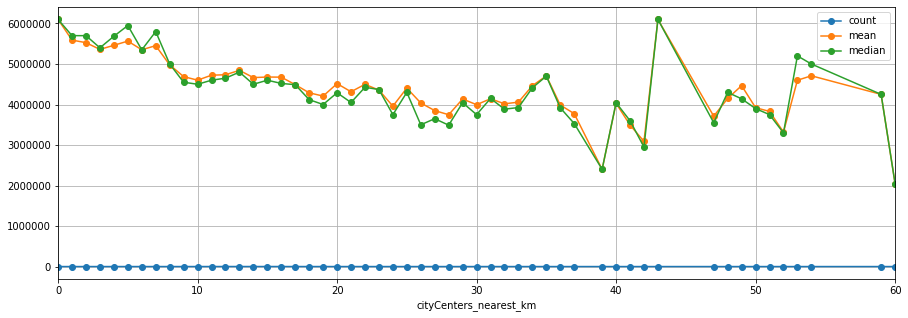

In [104]:
data_km_last_price.plot(kind='line', figsize = (15,5), style = 'o-', grid = True)

 судя по графику центром считать будем радиус в 3 километра.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Зависимость стоимости квадратного метра от количества комнат.

In [60]:
center_spb_data = data.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')

0.24050634654594327

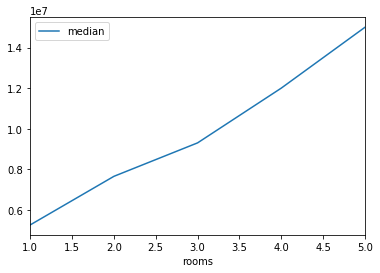

In [61]:
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_data['rooms'].corr(center_spb_data['last_price'])

На графике видно, что с увеличением комнат увеличивается стоимость.

Зависимость стоимости квадратного метра от этажа.

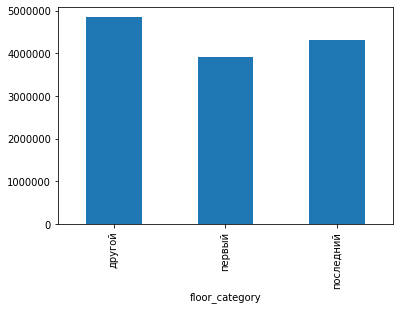

In [157]:
(data.groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',kind='bar')
)

Квартиры на первом этаже, чем на последнем

Зависимость стоимости квадратного метра от удаленности от центра.

-0.16424528185233575

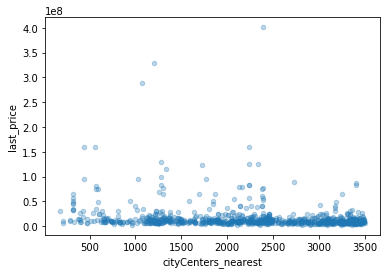

In [63]:
center_spb_data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

center_spb_data['cityCenters_nearest'].corr(center_spb_data['last_price'])

Зависимости нет

Зависимость стоимости квадратного метра от дня недели размещения объявления.

,mean,count,median
weekday_exposition,,,
0,1.535779e+07,132,10475000.0
6,1.607084e+07,57,10400000.0
2,1.541345e+07,143,10398000.0
3,1.792367e+07,194,10000000.0
1,1.814879e+07,131,9500000.0
4,1.426324e+07,163,9500000.0
5,1.726365e+07,57,8500000.0


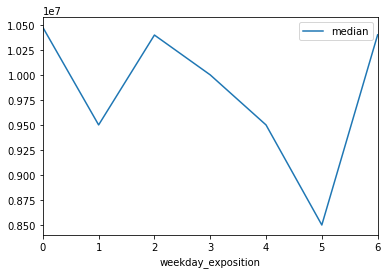

In [64]:
center_spb_weekday_exposition = center_spb_data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')

center_spb_weekday_exposition.sort_values('median', ascending = False)

Минимальные цены в субботу, самые высокие - в понедельник,среду и в воскресенье

Зависимость стоимости квадратного метра от месяца размещения объявления.

,mean,count,median
month_exposition,,,
4,2.070606e+07,85,10800000.0
9,1.525186e+07,80,10450000.0
12,1.848682e+07,67,10400000.0
3,1.684347e+07,85,10398000.0
2,1.784035e+07,108,10250000.0
1,1.613581e+07,59,10000000.0
6,1.379814e+07,50,9700000.0
7,1.415388e+07,80,9575000.0
5,1.247077e+07,48,9545000.0


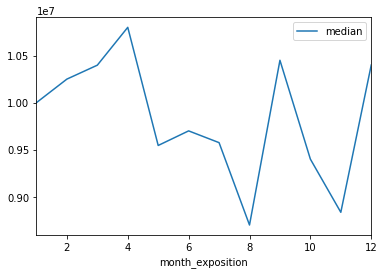

In [65]:
center_spb_month_exposition = center_spb_data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')

center_spb_month_exposition.sort_values('median', ascending = False)

Самая высокая стоимость в апреле. Самая низкая стоимость в августе.

Зависимость стоимости квадратного метра от года размещения объявления.

,mean,count,median
year_exposition,,,
2019,1.936709e+07,98,10949500.0
2015,1.903689e+07,90,10825000.0
2016,1.574725e+07,114,9875000.0
2018,1.492127e+07,247,9555000.0
2017,1.540696e+07,321,9000000.0


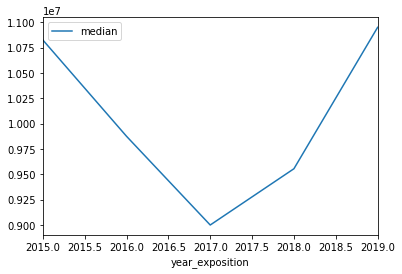

In [66]:
center_spb_year_exposition = center_spb_data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y = 'median')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

Цены в центре СПБ падали с 2015 по 2017 год,потом начали расти.

### Вывод

Мы обработали данные - обработали пропущенные значения там, где это необходимо. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют площадь квартиры, этаж квартиры, близость к центру. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 3 километров.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод